In [ ]:
#pip install jupyter_contrib_nbextensions
#pip install prince

In [2]:
%%HTML
<!DOCTYPE html>
<html>
    <head>
        <title>Data_Spaces_Thesis_2019</title>
    </head>

    <body>
        <h1 style="font-size:30px;" align="Center"> DATASPACES PROJECT 2019-2020 </h1>
        <hr>
        <h2 style="font-size:20px;" align="Center"> CAR PRICE PREDICTION </h2>
        <hr>
        <h3 style="font-size:20px;" align="Center"> S261954 - Juan Sebastián Gómez Vidal </h3>
    </body>
</html>


1. [Introduction](#Introduction)
2. [Dataset](#Dataset)
3. [Data_Cleansing](#Dataset_Cleansing)
4. [Exploratory_Data_Analysis](#Exploratory_Data_Analysis)
5. [Machine_Learning_Model](#Machine_Learning_Models)

<a id='Introduction'></a>

## 1. Introduction

According to stats from the Federal Statistical System of the United States and retail companies like Edmundus or Mckinsey, in 2018 were sold 17.3 million of new cars against to 39 million of used cars, this means that the American used-car market is roughly the double when compare to new-car market. [Mckinsey](https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/used-cars-new-platforms-accelerating-sales-in-a-digitally-disrupted-market)

Considering an average price of 45.000 usd for an used-car [CarGuru](https://www.cargurus.com/Cars/price-trends/) during 2018, then the total amount of money traded during this year tally to 1 billion of dollars with 107.000 second-hand vehicles negotatiated on a daily basis.

Above figures highlight the importance of the US used-car market in terms of money and number of transactions. Thus, For this project I would like to analyze and develope  a machine learning model that help people estimate the commercial price of used-cars starting by their main features like brand, gearing box, horse-power, fuel consumption, etc. 

The strategy to employ is to use a supervise algorithm for regression estimation. Correctness of this model is going to be evaluated in terms of R-squared, MSE and Accuracy.



<a id='Dataset'></a>

## 2. Dataset

The dataset of this project corresponds to information belonging to the USA used-car market collected by [Edmundus](https://www.edmunds.com) with help of the Federal Statistical System of the United States and posted in Kaggle by Cooper Union [Kaggle](https://www.kaggle.com/CooperUnion/cardataset).

Generally speaking data is comproud of 16 mixed features between categorical and numerical variables. Being the relevant variable the MSRP "Market Suggested Retail Price" as a numerical attribute and from here on known as target variable.

In [12]:
import pandas as pd

def load_cars_data():
    csv_path = "data.csv"
    return pd.read_csv(csv_path)


In [13]:
data = load_cars_data()

In [14]:
data.shape

(11914, 16)

In [15]:
data.size

190624

In [16]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
print ("{} Unique values for Make".format(data['Make'].nunique()))
print ("{} Unique values for Model".format(data['Model'].nunique()))
print ("{} Unique values for Year".format(data['Year'].nunique()))
print ("{} Unique values for Engine Fuel Type".format(data['Engine Fuel Type'].nunique()))
print ("{} Unique values for Engine Horse Power".format(data['Engine HP'].nunique()))
print ("{} Unique values for Engine Cylinders".format(data['Engine Cylinders'].nunique()))
print ("{} Unique values for Transmission".format(data['Transmission Type'].nunique()))
print ("{} Unique values for Driven Wheels".format(data['Driven_Wheels'].nunique()))
print ("{} Unique values for Number of Doors".format(data['Number of Doors'].nunique()))
print ("{} Unique values for Market Category".format(data['Market Category'].nunique()))
print ("{} Unique values for Vehicle Style".format(data['Vehicle Style'].nunique()))
print ("{} Unique values for Popularity".format(data['Popularity'].nunique()))
print ("{} Unique values for High way mpg".format(data['highway MPG'].nunique()))
print ("{} Unique values for city mpg".format(data['city mpg'].nunique()))
print ("{} Unique values for MSRP".format(data['MSRP'].nunique()))


48 Unique values for Make
915 Unique values for Model
28 Unique values for Year
10 Unique values for Engine Fuel Type
356 Unique values for Engine Horse Power
9 Unique values for Engine Cylinders
5 Unique values for Transmission
4 Unique values for Driven Wheels
3 Unique values for Number of Doors
71 Unique values for Market Category
16 Unique values for Vehicle Style
48 Unique values for Popularity
59 Unique values for High way mpg
69 Unique values for city mpg
6049 Unique values for MSRP


The number of data points present on the dataset is equal to 11.914, distributed over 16 variables, for a total of 190.624 collected fields. 

As said before, data belongs to mixed variables, that is, counts with numerical and categorical information, which would make the implementation of any statistical machine learning model quite hard. Therefore, it is needed to define a basic approach to discard not necesary variables and make this dataset easier to work with.

Features description:

<span style="color:blue">*1.Make:*</span> Describe the manufacturer of the car [Type :Categorical variable] [#values : 48]

<span style="color:blue">*2.Model:*</span> Refers to the specific model of the car  [Type :Categorical variable] [#values : 915]

<span style="color:blue">*3.Year:*</span> Built year [Type: Numerical variable - Integer] [#values : 28]

<span style="color:blue">*4.Engine Fuel Type:*</span> Type of fuel used by a car [Type: Categorical variable] [#values : 10]

<span style="color:blue">*5.Engine Hp:*</span> Engine Horsepower [Type: Numerical variable - Float] [#values : 356]

<span style="color:blue">*6.Engine cilinders:*</span> Number of ciliners in the motor [Type: Numerical variable - Integer] [#values : 9]

<span style="color:blue">*7.Tranmission Type:*</span> Type of shift-gears [Type :Categorical variable] [#values : 5]

<span style="color:blue">*8.Driven wheels:*</span> Wheel axels where the engine power is applied [Type :Categorical variable][#values : 4]

<span style="color:blue">*9.Number of Doors:*</span> Self-explained [Type: Numerical variable - Integer][#values : 3]

<span style="color:blue">*10.Market Category:*</span> Self-explained [Type :Ordinal variable] [#values : 71]

<span style="color:blue">*11.Vehicle size:*</span> Vehicle volume size [Type :Ordinal variable] [#values : 5]

<span style="color:blue">*12.Vehicle style:*</span> Luxury, Exotic, etc. [Type :Categorical variable] [#values : 16]

<span style="color:blue">*13.Popularity:*</span> Public opionions about a specifica brand-model [Type :Numerical variable] [#values : 48]

<span style="color:blue">*14.High-way mpg:*</span> Average fuel consumption in a highway [Type: Numerical variable - Integer] [#values : 59]

<span style="color:blue">*15.City mpg:*</span> Average fuel consumption in a city [Type: Numerical variable - Integer] [#values : 69]

<span style="color:blue">*16.MSRP [TARGET]:*</span> Market suggested retailed Price [Type: Numerical variable - Float] [#values : 6049]


<a id='Dataset_Cleansing'></a>

## 3. Data Cleansing

* In order to work with a homogenous dataset the fisrt step is to check if any variable has empty or null information.


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


There are 5 features which have missing/wrong values:

<span style="color:red">**- Engine HP.**</span>

<span style="color:red">**- Engine Fuel Type.**</span>

<span style="color:red">**- Engine Cylinders.**</span>

<span style="color:red">**- Number of Doors.**</span> 

<span style="color:red">**- Market Category.**</span> 

To confirm this, the next command is ran:

In [19]:
data.isnull().any()

Make                 False
Model                False
Year                 False
Engine Fuel Type      True
Engine HP             True
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors       True
Market Category       True
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

Once the features with missing values are identified, then it is needed to replace the not a number (NAN) spaces with a logical value, depending on the type of variable (categorical/numerical). 

The easiest way to tackle this problem is to neglect/delete those rows with missing values, but at the same time other valuable information would be lost as well,meaning to stepping into a radical area, erasing 3829 datapoints which would account for a 32% (1/3) of the initial data, what in my opinion, is not a good way to proceed.

The procedure that I follow is when a varaible is continuos a replace a missing/wrong value with the average mean of the feature and for the categorical ones a replace with the most frequent value present.

### Replacing NAN values

- Categorical features

In [20]:
# Engine Fuel Type feature
data["Engine Fuel Type"].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [21]:
# Replacing by the most frequent value
data["Engine Fuel Type"].fillna('regular unleaded', inplace = True)

<a id=''></a>

In [22]:
# Market Category Type feature
data["Market Category"].value_counts()

Crossover                                                 1110
Flex Fuel                                                  872
Luxury                                                     855
Luxury,Performance                                         673
Hatchback                                                  641
Performance                                                601
Crossover,Luxury                                           410
Luxury,High-Performance                                    334
Exotic,High-Performance                                    261
Hatchback,Performance                                      252
Factory Tuner,Luxury,High-Performance                      215
High-Performance                                           199
Hybrid                                                     123
Crossover,Luxury,Performance                               113
Factory Tuner,High-Performance                             106
Factory Tuner,Performance                              

In [23]:
# Replacing by the most frequent value
data["Market Category"].fillna('Crossover', inplace = True)

- Numerical features

In [24]:
# Engine Cylinders Type feature
data["Engine Cylinders"].mean()

5.628828677213059

In [25]:
# Replacing by the average integer value
data["Engine Cylinders"].fillna(6, inplace = True)

<a id=''></a>

In [26]:
# Number of Doors Type feature
data["Number of Doors"].mean()

3.4360933825999327

In [27]:
# Replacing by the average integer value
data["Number of Doors"].fillna(4, inplace = True)

<a id=''></a>

In [28]:
# Engine HP Type feature
data["Engine HP"].mean()

249.38607007176023

In [29]:
# Replacing by the average integer value
data["Engine HP"].fillna(249, inplace = True)

- Checking that all features are complete

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11914 non-null object
Engine HP            11914 non-null float64
Engine Cylinders     11914 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11914 non-null float64
Market Category      11914 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


### Changing Features' Names

The name of the features are changed by concatenating two consecutive words with an underline for further computanional operations.

In [31]:
data = data.rename(columns={"Engine HP": "Engine_HP", 
                            "Engine Fuel Type": "Engine_Fuel_Type", 
                            "Engine Cylinders": "Engine_Cylinders", 
                            "Transmission Type": "Transmission_Type",
                            "Market Category": "Market_Category", 
                            "Vehicle Size": "Vehicle_Size",
                            "Vehicle Style": "Vehicle_Style"})

In [32]:
data.shape

(11914, 16)

<a id='Exploratory_Data_Analysis'></a>

## 4. Exploratory Data Analysis

###  Relationship Between Features

At this stage a data-scientist should lay an hypothesis for lowering the dimensional space of the data-set in order to remove the data that clutters a thourough understanding of the information at hand. Thus, trying to build a connection between the predictors and the target variable is the most important task.

Since the dataset counts with numerical, cateforical variables and the target output is numerical then it is needed to seek a relationship between numerical-numerical and categorical-numerical variables. This is a hardly and complex task.

A modern matemathical method known as FMAD "Factory Analysis of Mixed Data" is going to be used, its novelty its that permits to handle this type of variable toguether.


Basically, the criteria used by this method is the next:

When data includes K quantitative variables k = 1,...,K and Q qualitative variables q = 1,..,Q. Then a z quantitative variable is defined, so:

- r(z,k) denotes the correlation coefficient between the variables k and z.
- N(z,q) denotes the squared correlation ratio between the variables q and z.

In this way, FAMD try to establish the best correspondence among variables by selecting:

$$ maximum \sum_{k} r^2(z,k) + \sum_{q} \eta^2(z,q)  $$ 

In practice, Python uses the prince library which includes a class FAMD that is in charge to apply the above equation with the objective of returning the explain variance according to the number of features.


In [33]:
## Import libraries
import prince
import pprint

famd = prince.FAMD(
     n_components=15,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',       ## Can be "auto", 'sklearn', 'fbpca'
     random_state=42)

## Fit FAMD object to data 
famd = famd.fit(data.drop('MSRP', axis=1)) ## Exclude target variable "MSRP"

## Inspect principal dimensions
result = famd. eigenvalues_

In [34]:
def variance (a):
    
    total_eigen = 0
    
    for i in a:
        total_eigen = total_eigen + i
    
    features = 1
    accum_var = 0
    
    for j in a:
        accum_var += (j/total_eigen)*100
        print("{:02d} | eigen_value {:.2f}  | variance {:.2f} | accumulated variance {}%".format(features, round(j,2), round((j/total_eigen)*100,2), round(accum_var,2)))
        features += 1
    

In [161]:
variance (result)

01 | eigen_value 47036.76  | variance 39.55 | accumulated variance 39.55%
02 | eigen_value 13956.47  | variance 11.73 | accumulated variance 51.28%
03 | eigen_value 9862.01  | variance 8.29 | accumulated variance 59.57%
04 | eigen_value 9293.79  | variance 7.81 | accumulated variance 67.38%
05 | eigen_value 6760.98  | variance 5.68 | accumulated variance 73.07%
06 | eigen_value 5897.65  | variance 4.96 | accumulated variance 78.03%
07 | eigen_value 4538.35  | variance 3.82 | accumulated variance 81.84%
08 | eigen_value 4083.93  | variance 3.43 | accumulated variance 85.27%
09 | eigen_value 3284.32  | variance 2.76 | accumulated variance 88.04%
10 | eigen_value 2973.56  | variance 2.50 | accumulated variance 90.54%
11 | eigen_value 2693.89  | variance 2.26 | accumulated variance 92.8%
12 | eigen_value 2395.07  | variance 2.01 | accumulated variance 94.81%
13 | eigen_value 2275.21  | variance 1.91 | accumulated variance 96.73%
14 | eigen_value 2022.68  | variance 1.70 | accumulated varia

In pratice, what this technique does it is to apply the 3 rules explain above in order to return the eigenvalues associated to each features.

Although, this method is not capable of associating yet the eigenvalues with a feature name, it is a good indicator of how many variables are enough to explain with a maximum detail the data.

At first glance this method shows that there are 6 features which attain around 80% of variance of the whole dataset, that is, a reduction from 15 variables to 6 variables can be performed, eliminating 9 variables.

Now, for finding those 6 important variables the dataset is split between numerical and categorical variables. For the numerical variables the Spearman's correlation method is used and for the categorical ones the ANOVA method.

<span style="color:black">**Spearmans's method**</span>

The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables.

This coefficient is calculated with the equation:

$$ \rho = \frac{\sum(x_i-\hat{x})(y_i-\hat{y})}{\sqrt{\sum(x_i-\hat{x})^2(y_i-\hat{y})^2}}\:\:[1]$$


Text(0.5, 1.0, "Spearman' coefficients")

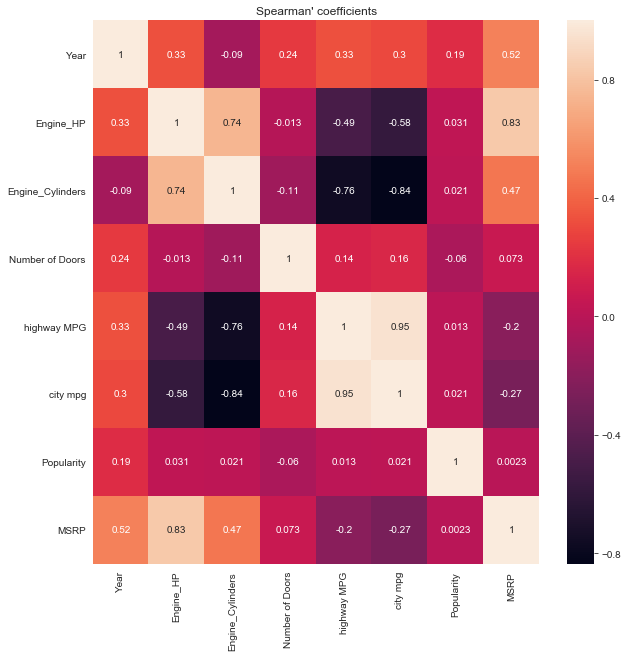

In [162]:
import seaborn as sns 
import matplotlib.pyplot as plt

numeric_corr = data[['Year', 'Engine_HP',
                     'Engine_Cylinders',
                     'Number of Doors',
                     'highway MPG', 
                     'city mpg', 
                     'Popularity', 
                     'MSRP']].corr(method='spearman') 

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(numeric_corr,annot=True)
plt.title('Spearman\' coefficients')

The result from this method highlights three features with a direct link with the target output, year of manufacture, horse power and number of cylinders, all coefficients with a value around or above 0.5, the other coefficients are small or negative, neglegible.

<span style="color:green">**- Year.**</span>

<span style="color:green">**- Engine HP.**</span>

<span style="color:green">**- Engine Cylinders.**</span>


<span style="color:black">**ANOVA's method**</span>

In a similar way as for the Spearman's method, the ANOVA method is used to analyze the relationship between the categorical variables and the output target. 

The ANOVA procedure is  powerful technique based in the comparissons of variances of variables to detect not only a basic relationship among input/output but goes further with a scope in between groups or within groups similarities or differences patterns to explain in detail how a group or the options inside it are link to the output. 

this method computes the next calculus: 


$$Sum\:of\:Square\:Between = \sum\sum (\hat{X_j} - \hat{X})^2\:\:[2]$$

$$Sum\:of\:Square\:Whithin = \sum\sum (\hat{X} - \hat{X_j})^2\:\:[3]$$

$$Sum\:of\:Square\:Error = \sum\sum (\hat{X_j} - \hat{X})^2\:\:[4]$$

$$Mean\:Square\:Between = \frac{Sum\:of\:Square\:Between}{Degree\:Freedom\:Between}\:\:[5]$$

$$Mean\:Square\:Error = \frac{Sum\:of\:Square\:Error}{Degree\:Freedom\:Error}\:\:[6]$$

$$F = \frac{MSB}{MSE}\:\:[7]$$

The equations that are crucial for determining which features impacts the output are the Sum Of Square Between [2] and the Sum Of Square Error [3], if the fist one is greater than the second one then it can be implied a direct connection from feature to output otherwise there is not relationship.

In [163]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

Anova_1 = data[['Make','MSRP']]
Anova_lm_1= ols('MSRP ~ Make', data=Anova_1).fit()

print("Anova MSRP ~ Make")
print("")
print(anova_lm(Anova_lm_1))


Anova MSRP ~ Make

               df        sum_sq       mean_sq           F  PR(>F)
Make         47.0  3.251586e+13  6.918268e+11  779.821115     0.0
Residual  11866.0  1.052705e+13  8.871609e+08         NaN     NaN


- [x] Make variable affects the target since 3.251586e+13 > 1.052705e+13 (3 times greater)

In [164]:
Anova_2 = data[['Model','MSRP']]
Anova_lm_2= ols('MSRP ~ Model', data=Anova_2).fit()

print("Anova MSRP ~ Model")
print("")
print(anova_lm(Anova_lm_2))

Anova MSRP ~ Model

               df        sum_sq       mean_sq          F  PR(>F)
Model       914.0  4.187997e+13  4.582053e+10  433.36477     0.0
Residual  10999.0  1.162946e+12  1.057320e+08        NaN     NaN


- [x] Model variable affects the target since 4.187997e+13 >> 1.162946e+12 (40 times greater)

In [165]:
Anova_3 = data[['Engine_Fuel_Type','MSRP']]
Anova_lm_3= ols('MSRP ~ Engine_Fuel_Type', data=Anova_3).fit()

print("Anova MSRP ~ Engine_Fuel_Type")
print("")
print(anova_lm(Anova_lm_3))

Anova MSRP ~ Engine_Fuel_Type

                       df        sum_sq       mean_sq          F  PR(>F)
Engine_Fuel_Type      9.0  1.048669e+13  1.165188e+12  426.04426     0.0
Residual          11904.0  3.255622e+13  2.734898e+09        NaN     NaN


- [ ] Engine Fuel Type variable does not affect the target since 1.048669e+13 << 3.255622e+13

In [166]:
Anova_4 = data[['Transmission_Type','MSRP']]
Anova_lm_4= ols('MSRP ~ Transmission_Type', data=Anova_4).fit()

print("Anova MSRP ~ Transmission_Type")
print("")
print(anova_lm(Anova_lm_4))

Anova MSRP ~ Transmission_Type

                        df        sum_sq       mean_sq           F  \
Transmission_Type      4.0  2.774439e+12  6.936099e+11  205.128218   
Residual           11909.0  4.026847e+13  3.381348e+09         NaN   

                          PR(>F)  
Transmission_Type  1.918331e-170  
Residual                     NaN  


- [ ] Transmission Type variable does not affect the target since 2.774439e+12 << 4.026847e+13

In [167]:
Anova_5 = data[['Driven_Wheels','MSRP']]
Anova_lm_5= ols('MSRP ~ Driven_Wheels', data=Anova_5).fit()

print("Anova MSRP ~ Driven_Wheels")
print("")
print(anova_lm(Anova_lm_5))

Anova MSRP ~ Driven_Wheels

                    df        sum_sq       mean_sq           F         PR(>F)
Driven_Wheels      3.0  2.988170e+12  9.960566e+11  296.170529  1.910219e-185
Residual       11910.0  4.005474e+13  3.363119e+09         NaN            NaN


- [ ] Driven Wheel variable does not affect the target since 2.988170e+12 << 4.005474e+13

In [168]:
Anova_6 = data[['Market_Category','MSRP']]
Anova_lm_6= ols('MSRP ~ Market_Category', data=Anova_6).fit()

print("Anova MSRP ~ Market_Category")
print("")
print(anova_lm(Anova_lm_6))

Anova MSRP ~ Market_Category

                      df        sum_sq       mean_sq          F  PR(>F)
Market_Category     70.0  2.371017e+13  3.387167e+11  207.49366     0.0
Residual         11843.0  1.933274e+13  1.632419e+09        NaN     NaN


- [x] Market Category variable affects the target since 2.371017e+13 > 1.933274e+13 (barely greater)

In [169]:
Anova_7 = data[['Vehicle_Size','MSRP']]
Anova_lm_7= ols('MSRP ~ Vehicle_Size', data=Anova_7).fit()

print("Anova MSRP ~ Vehicle_Size")
print("")
print(anova_lm(Anova_lm_7))

Anova MSRP ~ Vehicle_Size

                   df        sum_sq       mean_sq          F        PR(>F)
Vehicle_Size      2.0  6.917861e+11  3.458931e+11  97.280351  1.238858e-42
Residual      11911.0  4.235113e+13  3.555631e+09        NaN           NaN


- [ ] Vehicle Size variable does not affect the target since 6.917861e+11 << 4.235113e+13

In [170]:
# Vehicle Style
Anova_8 = data[['Vehicle_Style','MSRP']]
Anova_lm_8= ols('MSRP ~ Vehicle_Style', data=Anova_8).fit()

print("Anova MSRP ~ Vehicle_Style")
print("")
print(anova_lm(Anova_lm_8))

Anova MSRP ~ Vehicle_Style

                    df        sum_sq       mean_sq          F         PR(>F)
Vehicle_Style     15.0  4.497695e+12  2.998463e+11  92.555496  5.613983e-271
Residual       11898.0  3.854522e+13  3.239638e+09        NaN            NaN


- [ ] Vehicle Style variable does not affect the target since 4.497695e+12 << 3.854522e+13

After applying the analytical analysis proposed it can be stated that the features that can be linked directly to the target "MSRP" output are:

<span style="color:green">**- Make.**</span>

<span style="color:green">**- Model.**</span>

<span style="color:green">**- Market Category.**</span>


<span style="color:black">**Choosen Features**</span>

the 6 variables that explained the variance of the model with an accuracy around 80% are:

- [x] Make - Categorical
- [x] Model - Categorical
- [x] Year - Numerical
- [x] Engine HP - Numerical
- [x] Engine Cylinders - Numerical
- [x] Market Category - Categorical

Overall, if one relays in logic all these variables are the main characteristics that a person would base its decition at the time of purchasing a vehicle.

For example year of production will guide a person as how used could be the vehicle, model and make will have some sort of a commercial/social reputation since companies spent a lot of money in oder to be recognized on the market plus its know how, Engine HP and Cylinder will tell a buyer how much fuel consumption and power the vehicle handles and finally market category will instruct about if the car is standard, that is, comes with a basic configuration or rather luxury coming with hvac, electrical windows, gps, etc.

### Analysing Data

#### Basic Statistics

In [171]:
data.describe()

,Year,Engine_HP,Engine_Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.383834,5.629763,3.436377,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.875196,1.778413,0.881184,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#### General Information

* Distribution Plots

Text(0.5, 1.0, 'Year Distribution')

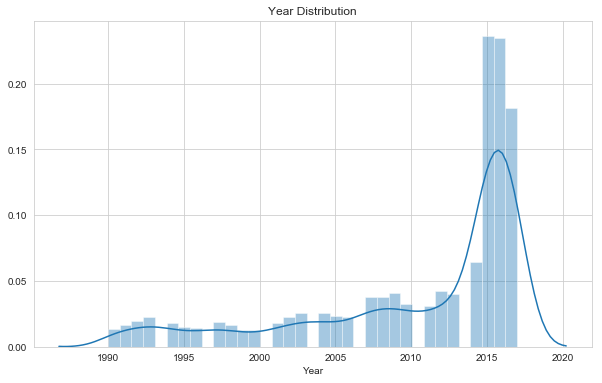

In [172]:
fig = plt.figure(figsize=(10, 6))
sns.distplot(data['Year'])
plt.title ("Year Distribution")       

In [173]:
cars_2015 = data[data.Year > 2015].count()
print("{} cars were traded after 2015".format(cars_2015['Year']))

3825 cars were traded after 2015


During 2018, 33% of vehicles [3825] traded belong to cars manufactured after 2015, this trend might signals that the American consumer like to buy recent cars not older than 3 years instead of older cars.

Text(0.5, 1.0, 'Engine_HP')

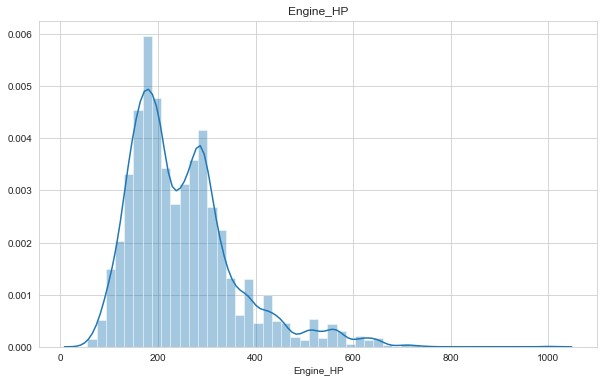

In [174]:
fig = plt.figure(figsize=(10, 6))
sns.distplot(data['Engine_HP'])
plt.title ("Engine_HP")

In [175]:
Engine_150 = data[data.Engine_HP <= 150].count()
Engine_350 = data[data.Engine_HP <= 350].count()
rango = Engine_350['Engine_HP'] - Engine_150['Engine_HP']
print("{} cars have a hp between 150 and 350".format(rango))

8295 cars have a hp between 150 and 350


American cars consumers buy cars with a horse power between 150 and 350 since 70% of used-cars sold in 2018 falls into this category. Also, the prefered hp seems to lay around 250 hp.

Text(0.5, 1.0, 'Engine_Cylinders')

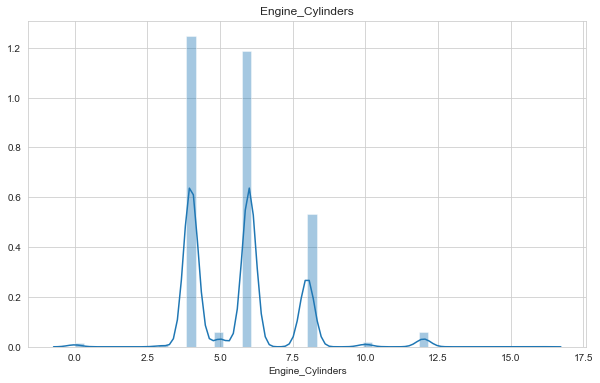

In [176]:
fig = plt.figure(figsize=(10, 6))
sns.distplot(data['Engine_Cylinders'])
plt.title ("Engine_Cylinders")

Engine structure shows that standard cars with 4 and 6 cylinders are the de facto commonality in the American second-hand cars but also points some predilection for cars with 8 cylinders.

* Frequency Plots

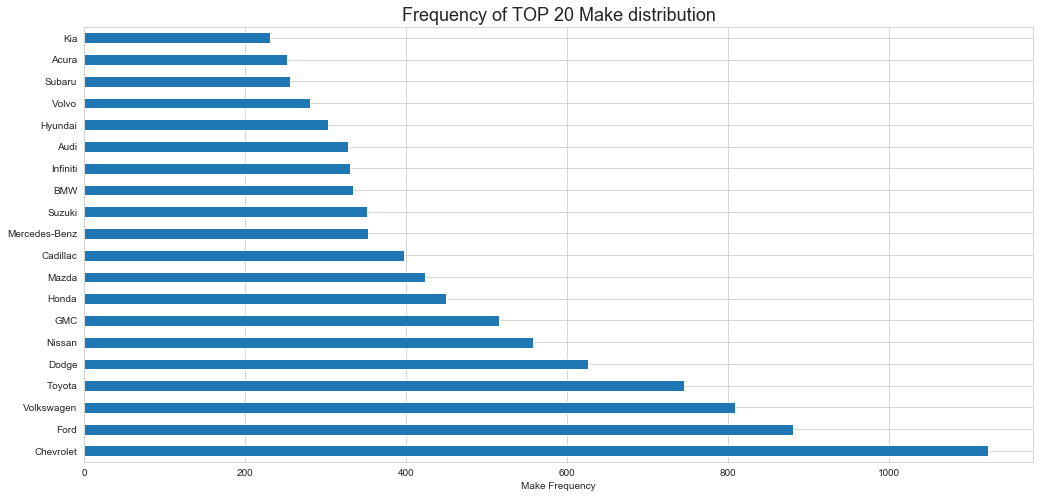

In [177]:
plt.figure(figsize=(17,8))
data.Make.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Make Frequency')
plt.title("Frequency of TOP 20 Make distribution",fontsize=18)
plt.show()

It is undeniable that the American consumer likes cars manufactured in its own country, since the most bought brands are Chevrolet and Ford but Foreign Cars have also an important market share such as Volkswagen and Toyota.

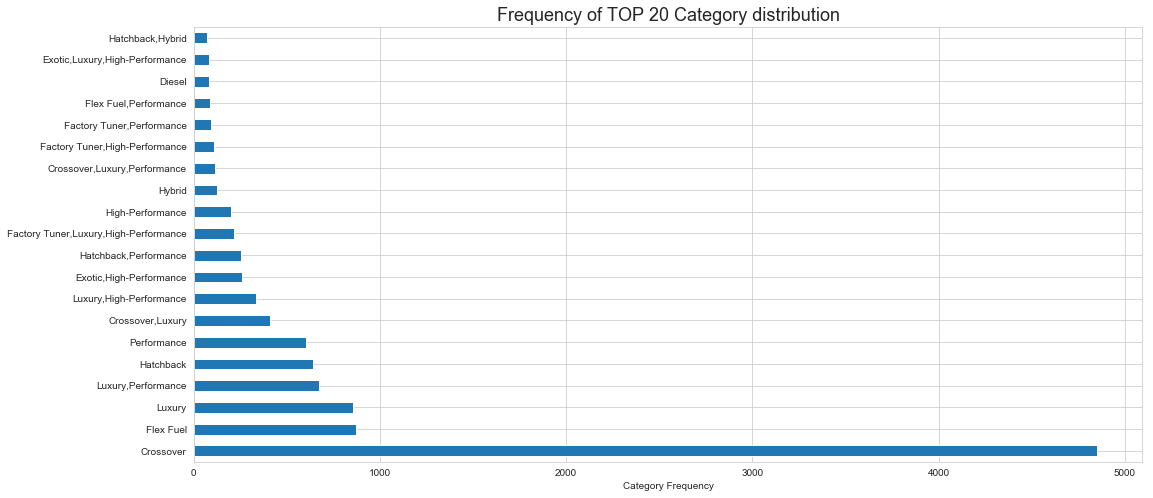

In [178]:
plt.figure(figsize=(17,8))
data.Market_Category.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Category Frequency')
plt.title("Frequency of TOP 20 Category distribution",fontsize=18)
plt.show()

40% of vehicles transactions are of the crossover market category label, this can be explained because they are big and comfortable, works in all type of terrains and are perfect for families. 

- Bivariate Plots 

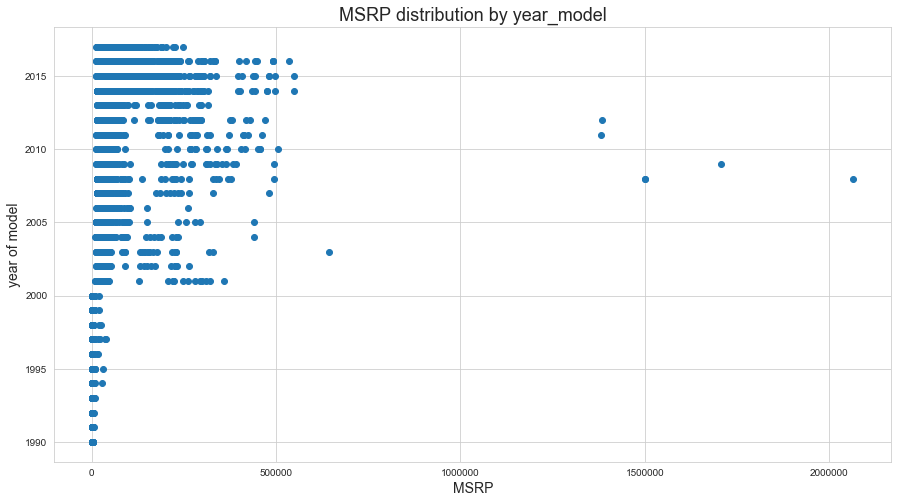

In [179]:
plt.figure(figsize=(15, 8))
plt.scatter(data.MSRP, data.Year)
plt.xlabel("MSRP", fontsize=14)
plt.ylabel("year of model", fontsize=14)
plt.title("MSRP distribution by year_model",fontsize=18)
plt.show()

An interesting pattern emerges here, cars prior the year 2000 seem to have a range price very simple, flat and economical. However, cars built from 2000 onwards can attain prices up to 500.000 thousand dollars, Although there are 6 points (nuisance) that overpass this price thi could indicate that Americans like to spend their money over expensive second-handed cars. 

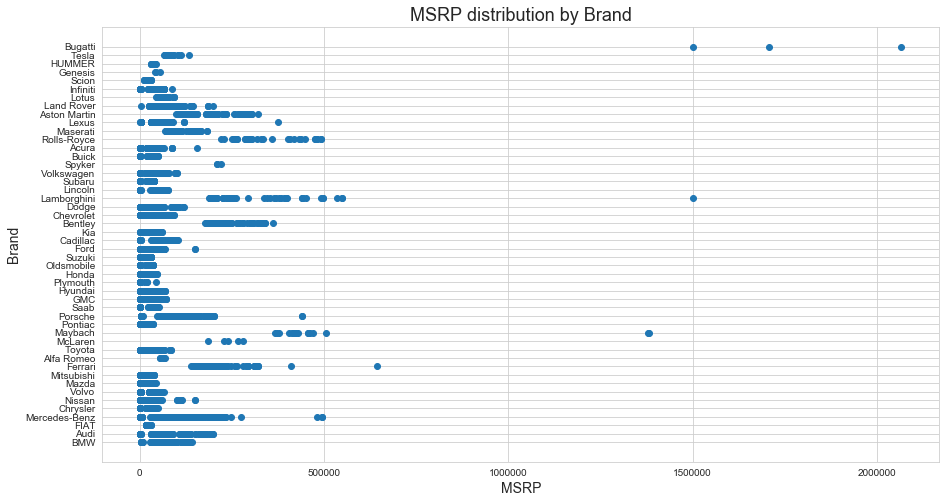

In [180]:
plt.figure(figsize=(15, 8))
plt.scatter(data.MSRP, data.Make)
plt.xlabel("MSRP", fontsize=14)
plt.ylabel("Brand", fontsize=14)
plt.title("MSRP distribution by Brand",fontsize=18)
plt.show()

The majority of the producers span from economy to costly cars but there are space as well for super expensive cars, that is, above hundred thousand dollars.

<a id='Machine_Learning_Models'></a>

## 5. Machine Learning Model

### Dataset Preprocessing

Here in practice the initial dataset is reduced from 16 to 7 features and there is an extra preprocessing done to categorical variables, that is, categorical column features are replaced by each of its constitutive elements which take a value of one on each associated arrow, the reason for this is to make possible to build frequencies without affecting the number of rows of the dataset but its column quantity number.

In litterature there are two types of transformations for categorical variables, the first one is label encoding, and the second one is the one hot encoding, for this dataset it is used the second type and the reason is because this has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set and it is necessary for the machine learning algorithm that is going to be proposed for building up the model.

In [181]:
data_X = data[['Make','Model','Year','Engine_HP','Engine_Cylinders','Market_Category']]

# Dummy Categorical Variables 
one_hot_data = pd.concat([data_X,pd.get_dummies(data_X['Make'],
                        drop_first=True,prefix="Make")],axis=1) 
one_hot_data = pd.concat([one_hot_data,pd.get_dummies(one_hot_data['Model'],
                        drop_first=True,prefix="Model")],axis=1)
one_hot_data = pd.concat([one_hot_data,pd.get_dummies(one_hot_data['Market_Category'],
                        drop_first=True,prefix="Category")],axis=1)

# Remove Original Make, Model .. categorical variable columns 
features_final = one_hot_data.drop(columns=['Make','Model','Market_Category']) 

#for col in features_final.columns: 
    #print(col) 

### Model

The model that I propose for this project is a tree regressor. this type of supervised algorithm has a transparent nature. Unlike other regression-making models, a decision tree regressor makes explicit all possible alternatives and traces each alternative to its conclusion in a single view, allowing for easy comparisson among the distinct alternatives. 

The use of separate nodes  to denote user defined decisions, uncertainties, and end of process tends to further clarity and transparency to the decision-making process. 

Also, it is flexible, that is manages categorical and numerical type of data and it is easy to use and understand. [Review](https://www.brighthubpm.com/project-planning/106000-advantages-of-decision-tree-analysis/)

#### - Tree Components 

<span style="color:black">**1. Root Node:**</span> It represents entire population or sample and this further gets divided into two or more homogeneous sets.

<span style="color:black">**2. Splitting:**</span> It is a process of dividing a node into two or more sub-nodes.

<span style="color:black">**3. Decision Node:**</span> When a sub-node splits into further sub-nodes, then it is called decision node.

<span style="color:black">**4. Leaf/Terminal Node:**</span> A node that do not split is called Leaf or Terminal node. 

<span style="color:black">**5. Prunning:**</span> When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.

<span style="color:black">**6. Branch/Sub-tree:**</span> A sub-section of an entire tree is called branch or sub-tree.

<span style="color:black">**7. Parent/Child Node:**</span> A node, which is divided into sub-nodes is called parent node of sub-nodes whereas sub-nodes are the child of parent node.

<img src="tree_parts.png">

#### - How It Works In Practice 

A decision tree is arriving at an estimate by asking a series of questions to the data, each question narrowing our possible values until the model get confident enough to make a single prediction. The order of the question as well as their content are being determined by the model. In addition, the questions asked  are all in a True/False form (Binary).

The tree starts at the root node at the top and progresses through the tree by constructing a path from top to bottom after evaluating at each sub-sequent decision node some binaries conditions which might lead to the jump to another decision node, this pattern repeat sequentially until a terminal node (leaf node) is eventually reached finding a prediction.

As a supervised machine learning model, a decision tree learns to map data to outputs in what is called the training phase of model building.

During training, the model is fitted with the available dataset that is relevant to the problem domain ("Features") and the true value we want the model to learn to predict ("MSRP"). The model learns any relationships between the data and the target variable.

After the training phase, the decision tree produces a tree similar to the one shown above, calculating the best binary conditions as well as their order of evaluation in order to make the most accurate estimates possible. 


#### - Tree Depth

Before delving into the construction of a tree regressor is better to try to assess the best depth that this model can have, that is limiting the maximum number of decision nodes a prediction could need to traverse before arriving into a terminal node, or in other words the maximum number of levels between the root node and a terminal node.

This is necessary, because trees with high depths are difficult to understand and could lead to bad generalization, since there are too many options to choose from. On the other hand, saves time in order to avoid manually detection (prune) of a tree regressor model.

For this, the next code is used.

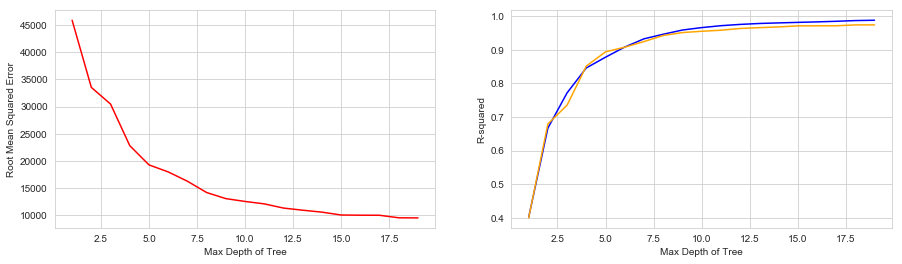

In [182]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(features_final, data['MSRP'], 
                                                    test_size=0.3, random_state=42)

trknn_scores=[]
teknn_scores= []
rmse_scores=[]

for i in np.arange(1,20,1):
    my_DT = tree.DecisionTreeRegressor(max_depth=i,random_state=42)
    my_DT.fit(X_train, y_train)
    y_pred_dt = my_DT.predict(X_test)
    train_scores = my_DT.score(X_train,y_train)
    test_scores = my_DT.score(X_test,y_test)
    # The Root mean squared error
    trknn_scores.append(train_scores)
    teknn_scores.append(test_scores)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_dt)))

sns.set_style('whitegrid')
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,4));
ax1.plot(np.arange(1,20,1),rmse_scores,color='red');
ax2.plot(np.arange(1,20,1),trknn_scores, color = 'blue');
ax2.plot(np.arange(1,20,1),teknn_scores, color = 'orange');
ax1.set_xlabel('Max Depth of Tree')
ax2.set_xlabel('Max Depth of Tree')
ax1.set_ylabel('Root Mean Squared Error')
ax2.set_ylabel('R-squared');

As can be seen, the two measure implemented are the Mean Square Error, a,  well known measure in the machine learning world and the R-squared measure which is a statistical measure of how close the data are to a fitted regression, in plain words,  it is the percentage of the response variable variation that is explained. Alike to Accuracy for label classification, R-squared is used on regression problems, the higher the R-squared, the better the model fits your data.

Here, the code ran constructed models with a length raging from 1 to 20 and plotted the respective graphs MRSE vs Depth and R-Squared vs Depth. Obviously, as higher depth better the prediction capability of the model but with the drawbacks already explained before.

From these values and taking into consideration a manageable depth, a value of 8 would permit to build a decent regressor tree with a good "MSE" between 10.000 and 15.000 a R-Squared around 90%.


#### - Building a Tree Regressor with Depth = 8

In [183]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus

X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                    data['MSRP'], test_size=0.5,shuffle = True,
                                    random_state=42)
my_DT = DecisionTreeRegressor(max_depth=8)
my_DT.fit(X_train, y_train)
y_pred_dt = my_DT.predict(X_test)
dot_data = StringIO()
export_graphviz(my_DT, out_file=dot_data,
                feature_names=features_final.columns,
                filled=True, rounded=True, 
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("tree_8.png")

True

###### **__Important__** : How does the algorithm does the splits ?

The decision of starting from a root node and making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.Decision trees regression normally use mean squared error (MSE) to decide to split a node in two or more sub-nodes. 

In essence a tree algorithm first will pick a value, and split the data into two subset. For each subset, it will calculate the MSE separately. The tree chooses the value with results in smallest MSE value.

so the pseudo code for splitting would be:

- Pick a variable and the value to split on such that the two groups are as different from each other as possible.

- For each variable, for each possible value of the possible value of that variable see whether it is better.

- Take weighted average of two new nodes (mse*num_samples).

those 3 steps are done iteratively until reaching a value of MSE zero or low compared to its prior decision node.

Clicking on the button and looking at the image, one can undestand that is obvious the root node has the biggest MSE but when it is splitted the true decition goes towards the decision node with the lowest MSE and the false decision to the opposite value.

This splitting process is done either until reaching a MSE equal to zero or low or reaching the set depth, that in this case is equal to 8.



In [3]:
%%html
<a class="image-link" href="tree_8.png">Click the Tree!</a>

#### - Evaluating The Tree Regressor with Depth = 8

The Score on the test set with a decision tree regressor is: 0.9108610330245653
Mean squared error: 16966.79


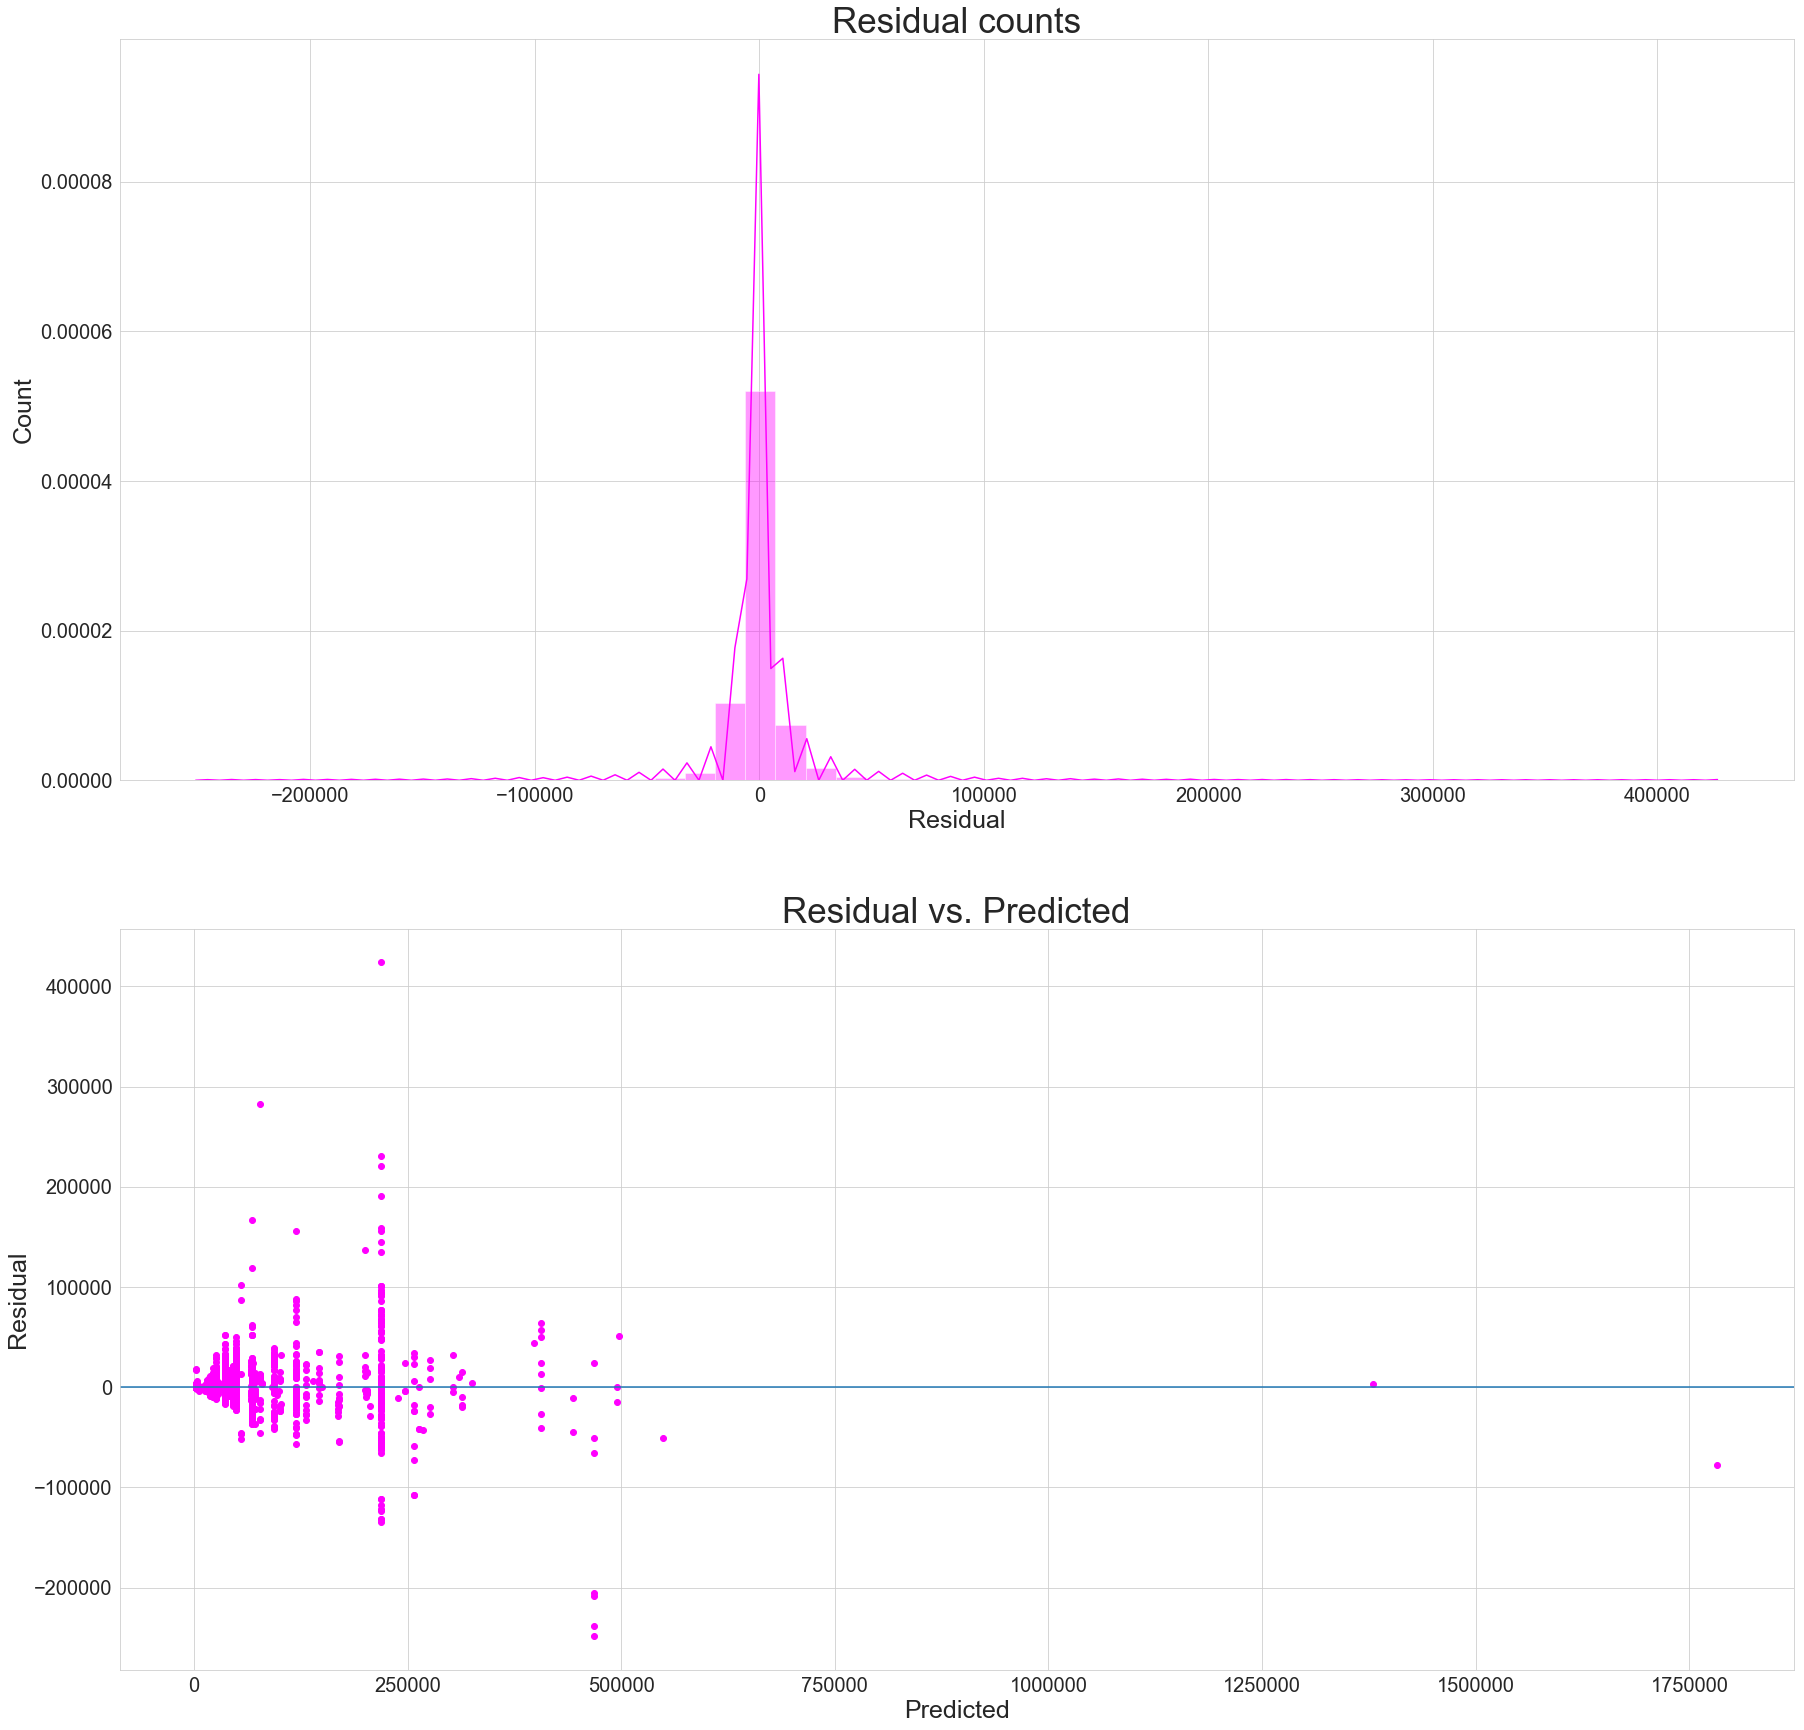

In [238]:
print('The Score on the test set with a decision tree regressor is:',my_DT.score(X_test,y_test))
print("Mean squared error: %.2f"% np.sqrt(mean_squared_error(y_test, y_pred_dt)))

predicted = y_pred_dt
residual = y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='magenta')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='magenta')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()
